L’objectif: Prédire l’apparition de défauts de production à partir de variables comme le volume, la qualité, la maintenance ou la consommation énergétique.

ETAPE 1 : Analyse Exploratoire des données EDA

In [12]:
#  Chargement des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#  1. Chargement des données
df = pd.read_csv("manufacturing_defect_dataset.csv")  # Remplace par le bon nom si nécessaire
#  2. Aperçu du dataset
print("Aperçu des données :")
display(df.head())

#ℹ 3. Informations sur les colonnes et types de données
print("\nInfos générales :")
print(df.info())


Aperçu des données :


,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1



Infos générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  Ad

In [60]:
#Statistiques descriptives
print("\nStatistiques descriptives :")
display(df.describe())


Statistiques descriptives :


,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


In [61]:
#Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


Valeurs manquantes par colonne :
ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64


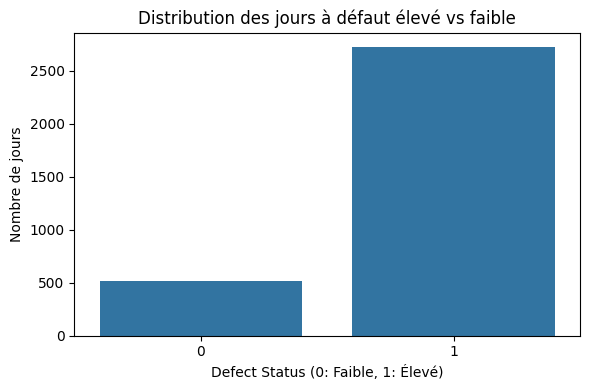

In [62]:
#Distribution de la variable cible 'DefectStatus'
plt.figure(figsize=(6, 4))
sns.countplot(x='DefectStatus', data=df)
plt.title("Distribution des jours à défaut élevé vs faible")
plt.xlabel("Defect Status (0: Faible, 1: Élevé)")
plt.ylabel("Nombre de jours")
plt.tight_layout()
plt.show()

Environ 84 % des jours sont classés comme défauts élevés (DefectStatus = 1).

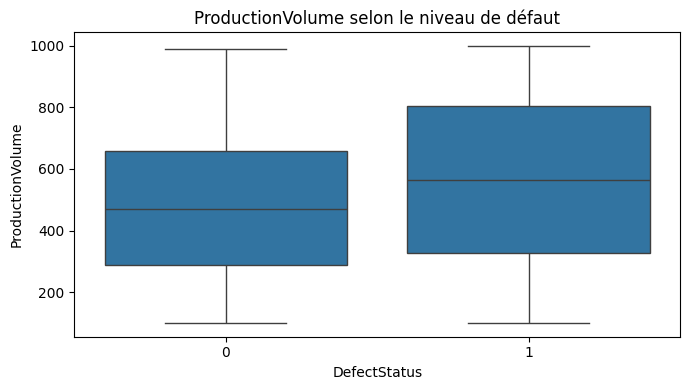

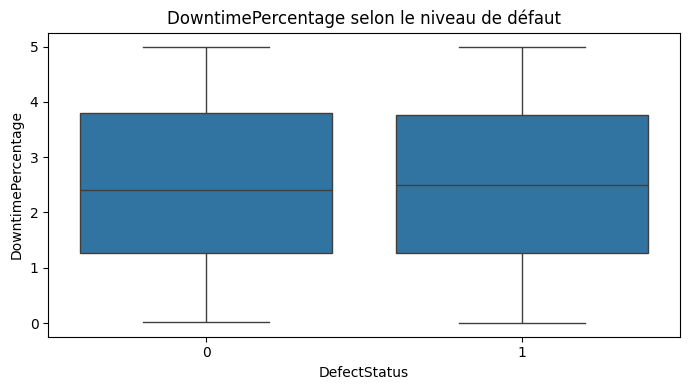

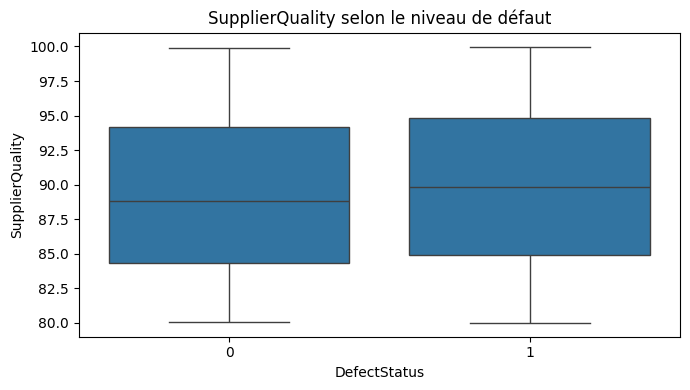

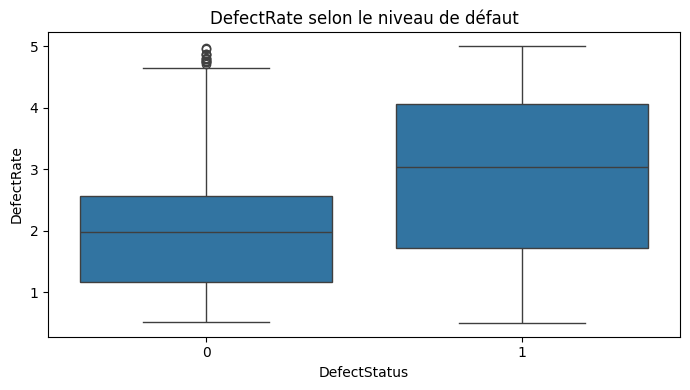

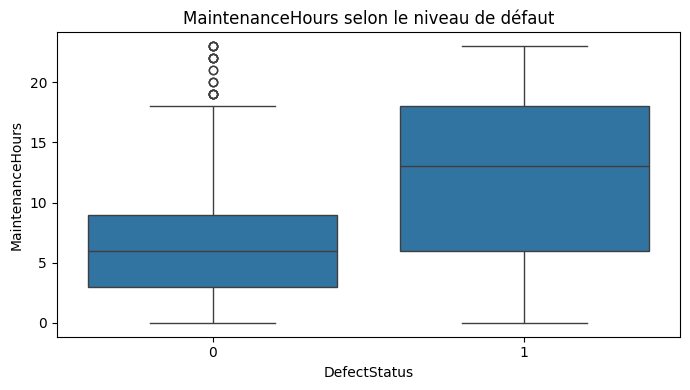

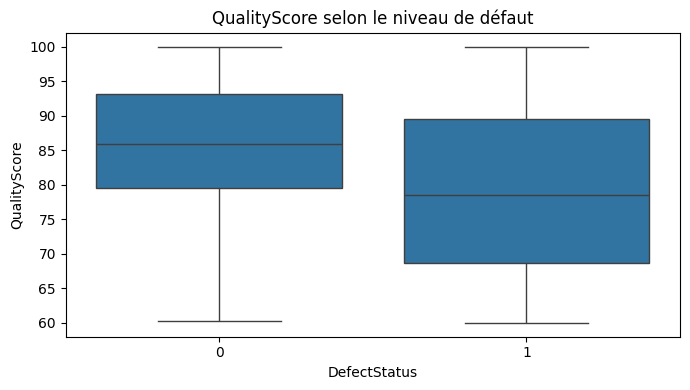

In [15]:
#  7. Visualisation de quelques variables clés
variables_a_visualiser = ['ProductionVolume', 'DowntimePercentage', 'SupplierQuality', 
                          'DefectRate', 'MaintenanceHours', 'QualityScore']

for var in variables_a_visualiser:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='DefectStatus', y=var, data=df)
    plt.title(f"{var} selon le niveau de défaut")
    plt.tight_layout()
    plt.show()

Nettement plus bas en cas de DefectStatus = 1.
Fort facteur discriminant à surveiller pour la modélisation.

ETAPE 2 : Détection de sous-performance et causes racines

Objectif 
Identifier les facteurs qui sont réellement associés à une performance dégradée, c’est-à-dire aux jours où il y a un haut niveau de défauts (DefectStatus = 1).


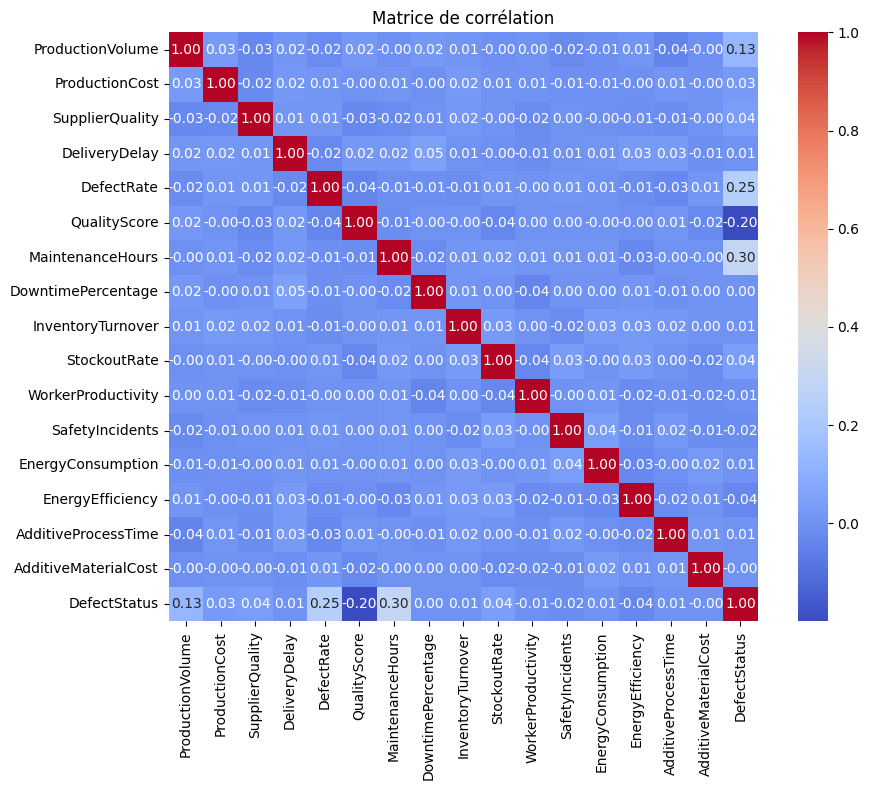

In [16]:
#  8. Matrice de corrélation
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

DefectStatus est modérément corrélé à QualityScore (−0.20) et MaintenanceHours (+0.30).
DefectRate aussi (corrélation +0.25), ce qui est cohérent.

On cherche à répondre à :
    • Qu’est-ce qui différencie concrètement les jours avec beaucoup de défauts des jours sans ?
    • Quels sont les paramètres (volume, maintenance, qualité...) qui semblent les plus liés à l’augmentation du taux de défaut ?
    • Existe-t-il des seuils critiques ou des combinaisons de facteurs déclenchants ?

In [18]:
# Séparer les deux groupes : jours à défaut élevé (1) vs faible (0)
df_defaut_eleve = df[df['DefectStatus'] == 1]
df_defaut_faible = df[df['DefectStatus'] == 0]

#  1. Moyenne par groupe
print("Moyennes par groupe :")
moyennes_comparées = df.groupby("DefectStatus").mean().T
display(moyennes_comparées)


Moyennes par groupe :


DefectStatus,0,1
ProductionVolume,470.866538,563.267352
ProductionCost,12158.877326,12473.169403
SupplierQuality,89.328686,89.929096
DeliveryDelay,2.537718,2.562982
DefectRate,2.010328,2.889386
QualityScore,85.442375,79.126454
MaintenanceHours,6.791103,12.366140
DowntimePercentage,2.487697,2.503970
InventoryTurnover,5.983667,6.026496
StockoutRate,0.048197,0.051387


Interprétation / Causes probables de sous-performance
    • Lorsque la qualité générale chute (QualityScore bas), les défauts augmentent → logique métier.
    • Une augmentation de la maintenance semble survenir dans les jours à défaut élevé. Cela suggère que :
        -soit la maintenance est insuffisante en amont,
        -soit elle est réactive à des problèmes déjà survenus.
    • Une production plus intense peut dégrader les contrôles qualité ou fatiguer les lignes → surcharge opérationnelle.


In [19]:

#  2. Écart relatif entre les deux groupes
moyennes_comparées['Ecart_absolu'] = abs(moyennes_comparées[1] - moyennes_comparées[0])
moyennes_comparées = moyennes_comparées.sort_values("Ecart_absolu", ascending=False)
display(moyennes_comparées[['Ecart_absolu']])

DefectStatus,Ecart_absolu
ProductionCost,314.292076
ProductionVolume,92.400814
EnergyConsumption,15.868438
QualityScore,6.315922
MaintenanceHours,5.575038
DefectRate,0.879057
SupplierQuality,0.600410
AdditiveMaterialCost,0.302673
SafetyIncidents,0.126831
WorkerProductivity,0.081643


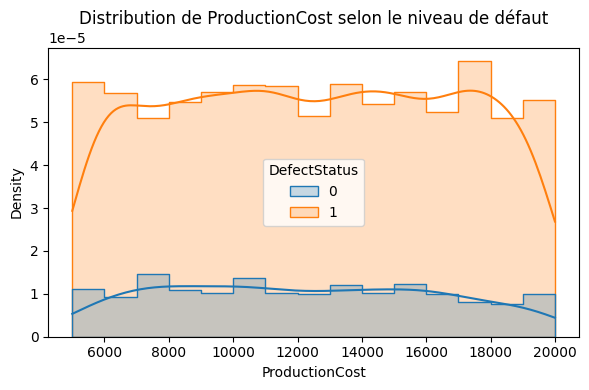

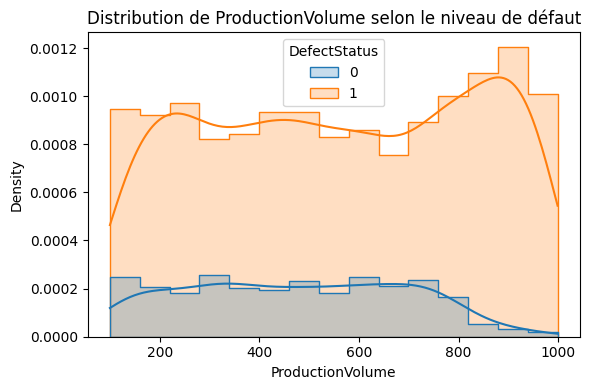

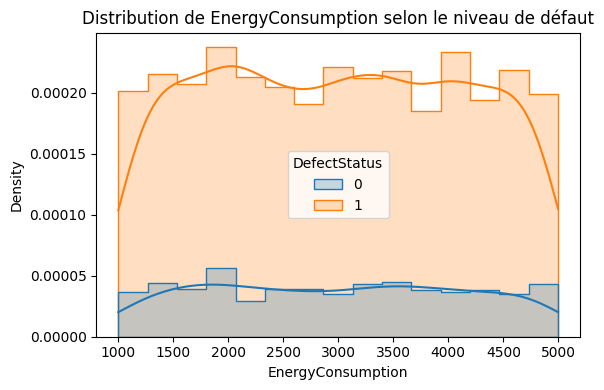

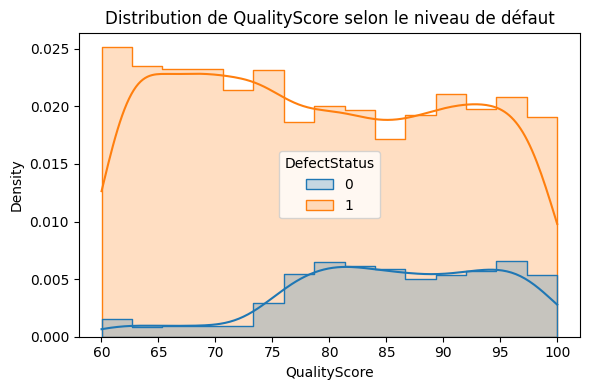

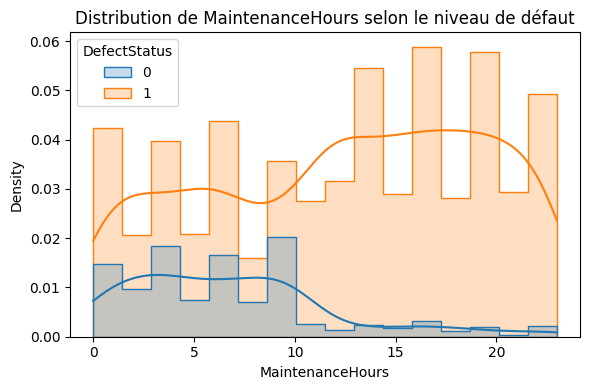

In [24]:
# 3. Visualiser les écarts majeurs (Top 5)
top_ecarts = moyennes_comparées.head(5).index.tolist()

for var in top_ecarts:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, hue="DefectStatus", kde=True, element="step", stat="density")
    plt.title(f"Distribution de {var} selon le niveau de défaut")
    plt.tight_layout()
    plt.show()

#  4. Export des insights chiffrés pour une future présentation
moyennes_comparées[['Ecart_absolu']].to_csv("ecarts_moyens_par_variable.csv")

On observe que les jours avec un défaut élevé  sont associés à un nombre d’heures de maintenance bien plus élevé. Cela laisse penser qu’une forte charge de maintenance peut être un facteur aggravant du niveau de défaut.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

#  Cible
target = "DefectStatus"

#  Variables explicatives les plus pertinentes
features = ['ProductionVolume', 'ProductionCost', 'EnergyConsumption', 
            'QualityScore', 'MaintenanceHours']
#  Séparation des données
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)


In [55]:
#  Modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
#  Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

#  Évaluation
print("Classification report :\n", classification_report(y_test, y_pred))
print("ROC AUC :", roc_auc_score(y_test, y_proba))

Classification report :
               precision    recall  f1-score   support

           0       0.51      0.46      0.48       129
           1       0.90      0.92      0.91       681

    accuracy                           0.84       810
   macro avg       0.70      0.69      0.69       810
weighted avg       0.84      0.84      0.84       810

ROC AUC : 0.8062356998941363


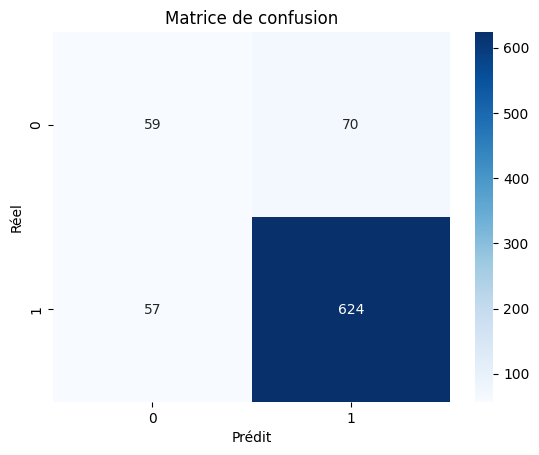

In [56]:
#  Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


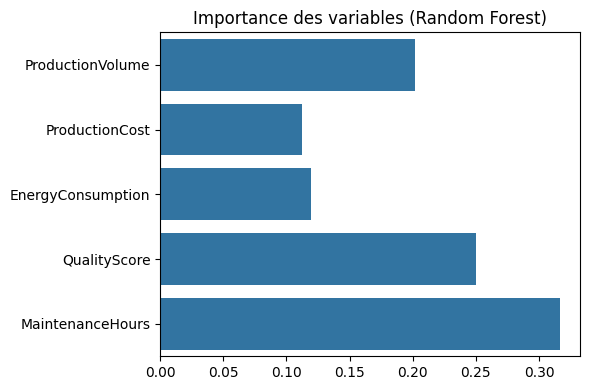

In [57]:
#  Importance des variables
importances = model.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.title("Importance des variables (Random Forest)")
plt.tight_layout()
plt.show()

In [58]:
import joblib

# Enregistrer le modèle
joblib.dump(model, "modele_defaut.pkl")


['modele_defaut.pkl']

In [59]:
df.to_csv("dataset_defaut.csv", index=False)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

#  Cible + variables explicatives (mêmes que précédemment)
features = ['ProductionVolume', 'ProductionCost', 'EnergyConsumption', 
            'QualityScore', 'MaintenanceHours']
X = df[features]
y = df['DefectStatus']

# 🌲 Modèle
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

#  Validation croisée à 5 plis
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

#  Affichage des résultats
print("Scores AUC sur les 5 plis :", scores)
print("Moyenne AUC :", np.mean(scores))
print("Écart-type :", np.std(scores))


Scores AUC sur les 5 plis : [0.94885544 0.94237998 0.94141801 0.87804016 0.48662861]
Moyenne AUC : 0.8394644377839642
Écart-type : 0.1782883846759925
